# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df = pd.DataFrame(total_data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.shape

(48895, 16)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.isnull

<bound method DataFrame.isnull of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [6]:
# Let's check to see if we have any duplicates within our data set
print(df.shape)

df = df.drop_duplicates()
df.shape

(48895, 16)


(48895, 16)

Looks like after dropping any potential duplicates, we are left with the same amount of rows, so we are duplicate free.

In [7]:
# ridding of columns not pertaining to my predictive analysis
df.drop(["id", "host_id", "name", "host_name", "latitude", "longitude", "availability_365"], axis= 1, inplace= True)
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6


In [8]:
df.nunique()

neighbourhood_group                  5
neighbourhood                      221
room_type                            3
price                              674
minimum_nights                     109
number_of_reviews                  394
last_review                       1764
reviews_per_month                  937
calculated_host_listings_count      47
dtype: int64

In [9]:
# Different types of 'rooms' available
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [10]:
# Analysis of prices
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
print(f"The least expensive property is {min_price}, while the most expensive is {max_price}.  Finally, the average price within the data set is {mean_price}")

# Replacing the 10 listings with a value of 0 for price with the median price ($152.72)
# df['price'] = df['price'].replace(0, mean_price) # 

The least expensive property is 0, while the most expensive is 10000.  Finally, the average price within the data set is 152.7206871868289


In [11]:
# We must factorize the Room Types and the Neighbourhood/Neighbourhood Group columns to convert the categorical columns to numeric.
df["room_type_n"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]

In [12]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,room_type_n,neighbourhood_group_n,neighbourhood_n
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,0,0,0
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,1,1,1
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,0,1,2
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,1,0,3
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,1,1,4



price_range
0-50           5027
51-100        16850
101-150       10033
151-200        7200
201-250        3559
251-300        2308
301-500        2683
501-1000        937
1001-2000       188
2001-4000        75
4001-6000        17
6001-8000        10
8001-10001        8
Name: count, dtype: int64


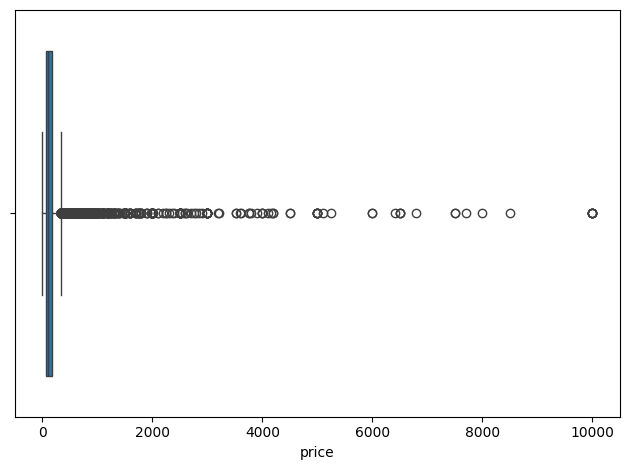

In [13]:
sns.boxplot(x=df['price'])

# Looking into the ranges of prices
bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10001]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10001' ]
df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels, right=False)
value_counts = df['price_range'].value_counts().sort_index()
plt.tight_layout()
print()
print(value_counts)

In [14]:
'''
Experimenting and noting various sorted datasets by price, mimumum nights, etc. whether ascending or descending.
  Various private rooms for $3000-9000 per night?! I think not.
'''

df[df['price'].duplicated()].sort_values(by='price', ascending=False).head(12)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,room_type_n,neighbourhood_group_n,neighbourhood_n,price_range
29238,Manhattan,Upper West Side,Entire home/apt,10000,30,0,NaN,NaN,1,1,1,8,8001-10001
17692,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,2017-07-27,0.16,1,1,0,20,8001-10001
40433,Manhattan,Lower East Side,Entire home/apt,9999,30,0,NaN,NaN,1,1,1,23,8001-10001
12342,Manhattan,Lower East Side,Private room,9999,99,6,2016-01-01,0.14,1,0,1,23,8001-10001
45666,Brooklyn,East Flatbush,Private room,7500,1,8,2019-07-07,6.15,2,0,0,54,6001-8000
48043,Manhattan,Tribeca,Entire home/apt,6500,180,0,NaN,NaN,1,1,1,77,6001-8000
37194,Manhattan,Upper West Side,Private room,6500,30,0,NaN,NaN,1,0,1,8,6001-8000
15560,Manhattan,Greenwich Village,Entire home/apt,6000,1,0,NaN,NaN,1,1,1,52,6001-8000
4345,Brooklyn,Bedford-Stuyvesant,Private room,5000,6,10,2016-01-02,0.16,1,0,0,6,4001-6000
38000,Manhattan,Harlem,Entire home/apt,5000,1,2,2019-02-23,0.38,2,1,1,2,4001-6000


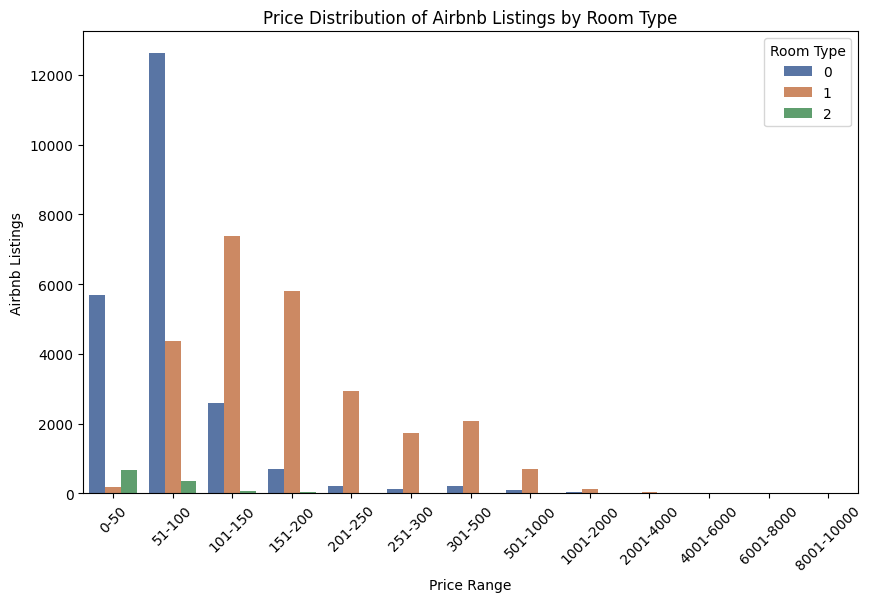

In [15]:
# Now let us separate the distinct categorical types of rentals and their data; shared room, private room, or the entire apartment.
df['room_type_encoded'], unique_room_types = pd.factorize(df['room_type_n'])

bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10000]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000' ]

df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels)

# Filter for 'Private room' and 'Entire home/apt' only
filtered_df = df[df['room_type_n'].isin(['Shared Room', 'Private Room', 'Entire Home/Apt'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range', hue='room_type_encoded', palette='deep')

plt.legend(title='Room Type', labels=unique_room_types)
plt.xticks(rotation=45)
plt.title('Price Distribution of Airbnb Listings by Room Type')
plt.xlabel('Price Range')
plt.ylabel('Airbnb Listings')

plt.show()

neighbourhood_group_n
1    21661
0    20104
2     5666
4     1091
3      373
Name: count, dtype: int64

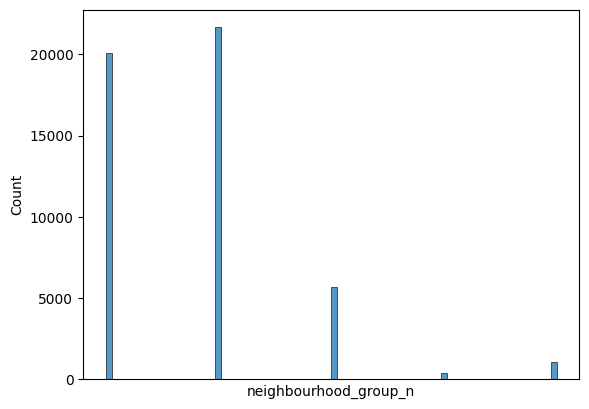

In [16]:
# Histogram of neighborhood groups
sns.histplot(data = df, x = "neighbourhood_group_n").set_xticks([])
# Where these properties are located throughout NY
df['neighbourhood_group_n'].value_counts()

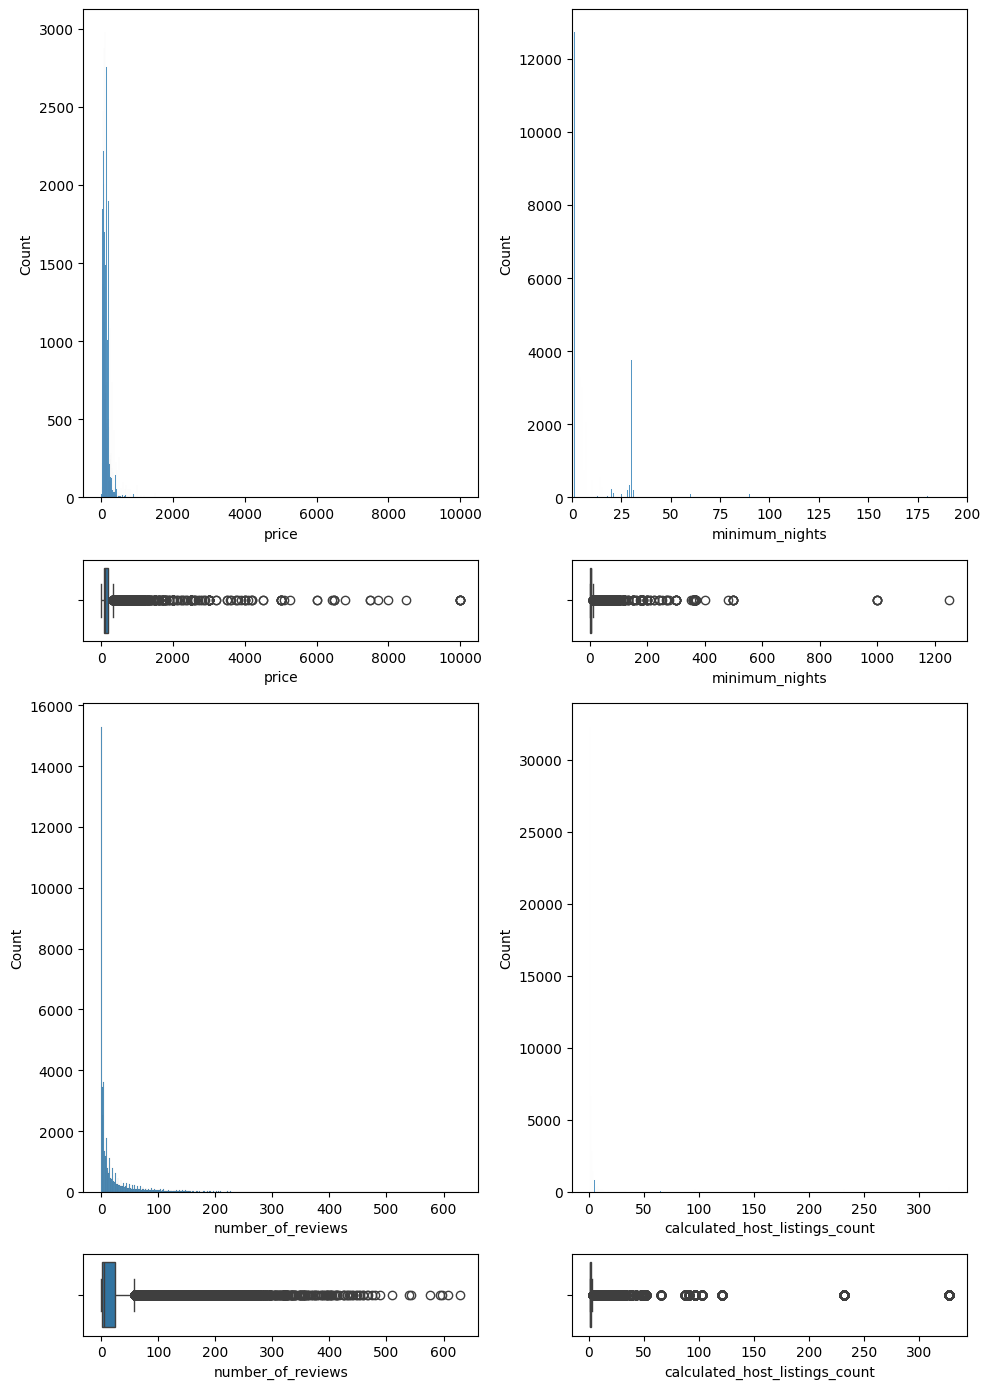

In [17]:
# Looking at some histograms and boxplot in regards to the numerical type variables

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

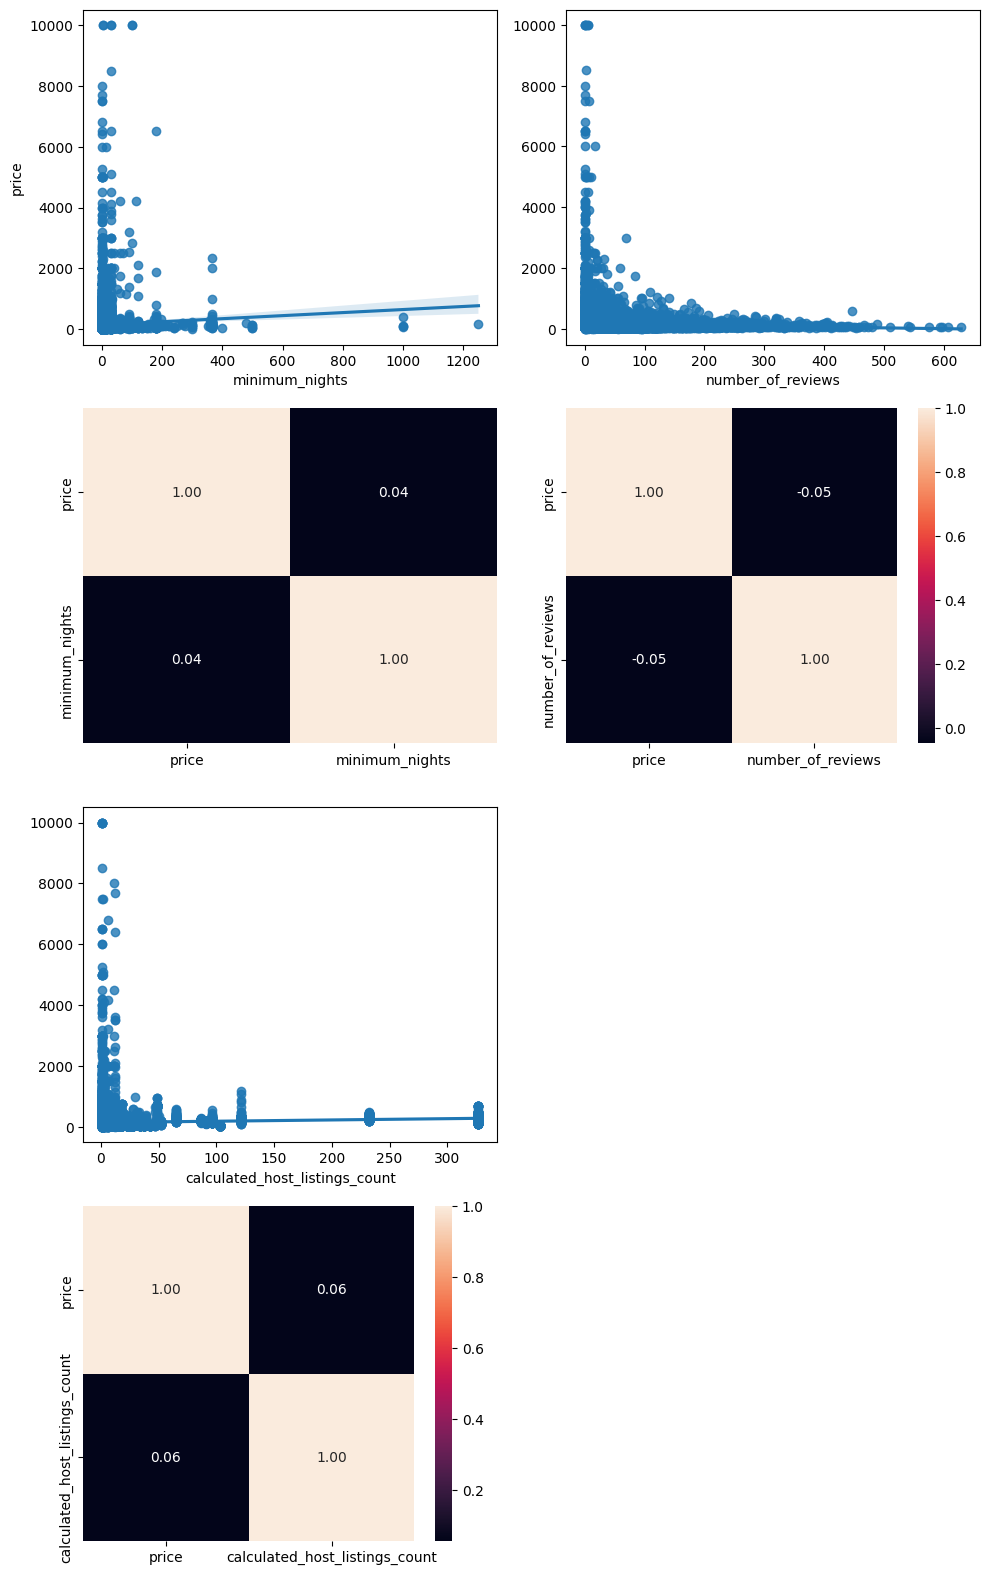

In [18]:
# Starting with some Numerical to Numerical Analysis to see if there is anything relevant

# Subplot similar to earlier dimensions
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Plotting and heatmaps to draw conclusions between these numeric variables
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

With values consistently in the .05 to .06 range whether positively or negatively, there is no correlation to speak of.  

Just some interesting things to note, you do not see any properties above 2000 in price with nearly as many reviews, simply assuming that those 
who can afford those places must be a considerably lower number of airbnb guests.  

Also, somewhat confusing that there are quite a few listings with 365 set as the minimum amount of nights and even 6 listing highter than that, with a couple even (assuming it the highest value allowed on the app) at 999.

The final comparison simply doesn't have anything in correlation whatsoever, as we say, garbage in, garbage out!


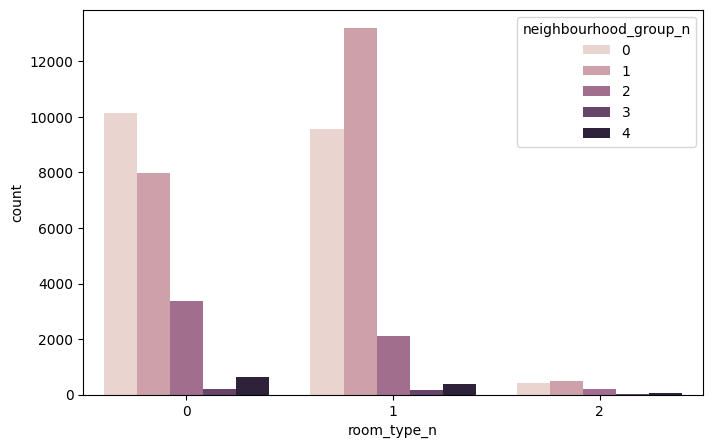

In [19]:
# What about the analysis between two Categorical subsets?

# set the parameters
fig, axis = plt.subplots(figsize = (8, 5))

# create a countplot to see where these listings are by type and including where in New York
sns.countplot(data = df, x = "room_type_n", hue = "neighbourhood_group_n")

plt.show()

Taking a look at this countplot and a quick google search, I found it interesting to note that comparing the size of these areas of New York

** By area, Queens is the largest at 109 square miles, followed by Brooklyn (69 square miles), Staten Island (58 square miles), 
the Bronx (42 square miles) and Manhattan is the smallest at 23 square miles.**
** Population Density** (pop/mi.**2)
Queens: 22,069
Brooklyn: 39,652
Staten Island: 8,547
The Bronx: 25,321
Manhattan: 73,663

Now, it appears that Brooklyn edges out the total offerings over Manhattan by a small margin, thanks to the 10000+ private room offerings available.

Considerably less in 3rd, 4th, and 5th place we find Queens, The Bronx, and finally Staten Island respectively.

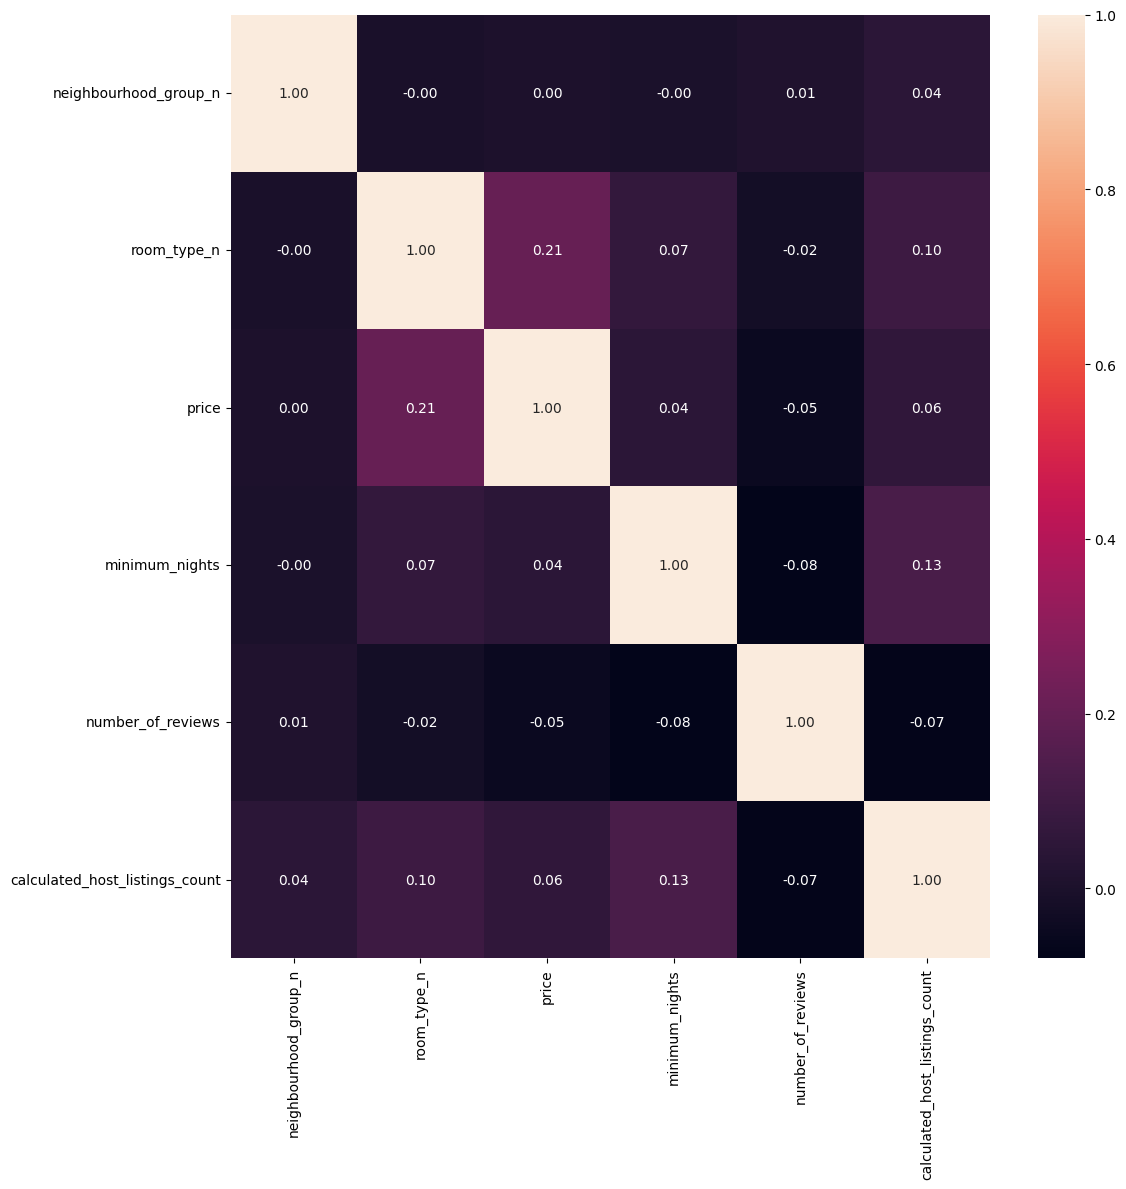

In [20]:
# Now we can explore some analysis between Numerical and Categorical

fig, axes = plt.subplots(figsize=(12, 12))

# heatmap to understand the correlation between each set of columns
sns.heatmap(df[["neighbourhood_group_n", "room_type_n", "price", "minimum_nights", "number_of_reviews", 
                "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Quick analysis of this heatmap will tell you that there is minimal correlation to be drawn from these sets of variables.

The strongest correlation we see (although not that significat) is .21 with the relation between the listings price vs the type 
of room offered, which can be easily understood that as the bulk of available places goes up in price, 
they will tend towards becoming a private room and ultimately even more offerings yet as the entire apartment or home.

In [21]:
df = df.drop(['neighbourhood_group', 'price_range', 'neighbourhood', 'room_type', 'room_type_encoded'], axis=1)
df

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,room_type_n,neighbourhood_group_n,neighbourhood_n
0,149,1,9,2018-10-19,0.21,6,0,0,0
1,225,1,45,2019-05-21,0.38,2,1,1,1
2,150,3,0,NaN,NaN,1,0,1,2
3,89,1,270,2019-07-05,4.64,1,1,0,3
4,80,10,9,2018-11-19,0.10,1,1,1,4
...,...,...,...,...,...,...,...,...,...
48890,70,2,0,NaN,NaN,2,0,0,6
48891,40,4,0,NaN,NaN,2,0,0,21
48892,115,10,0,NaN,NaN,1,1,1,2
48893,55,1,0,NaN,NaN,6,2,1,7


In [22]:
df.head()

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,room_type_n,neighbourhood_group_n,neighbourhood_n
0,149,1,9,2018-10-19,0.21,6,0,0,0
1,225,1,45,2019-05-21,0.38,2,1,1,1
2,150,3,0,NaN,NaN,1,0,1,2
3,89,1,270,2019-07-05,4.64,1,1,0,3
4,80,10,9,2018-11-19,0.10,1,1,1,4


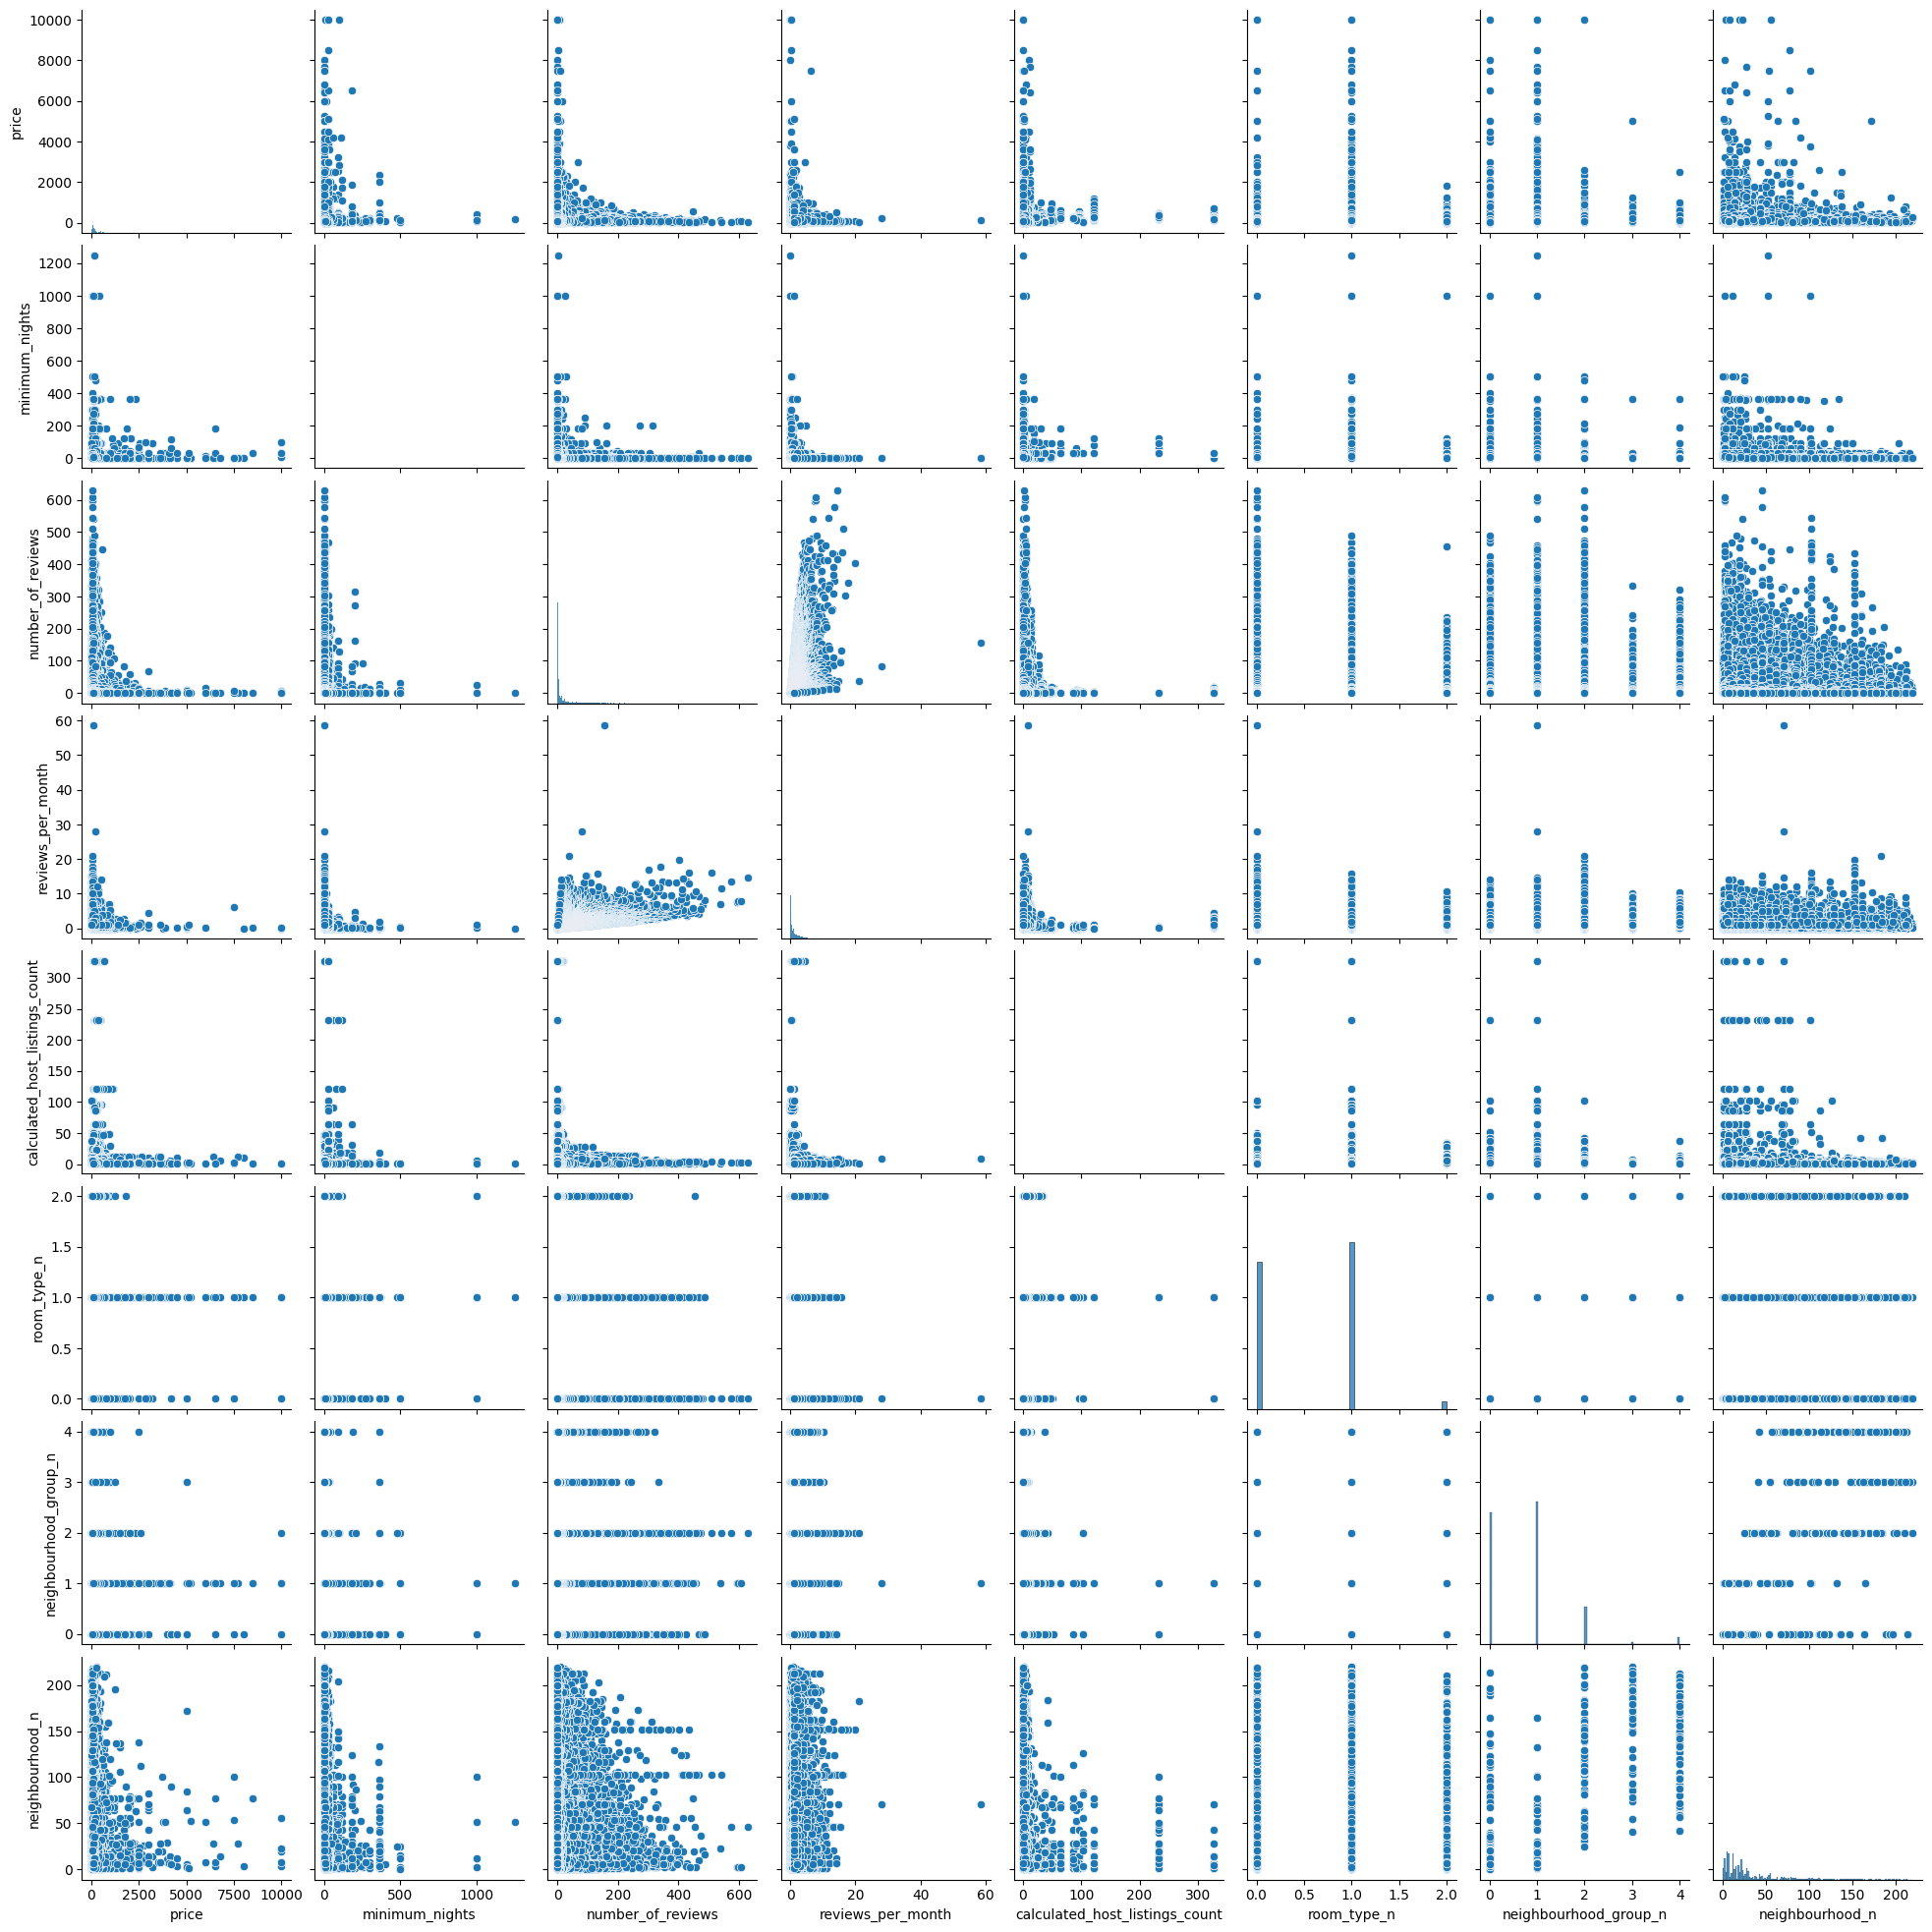

In [23]:
# To demonstrate all of the columns in being analyzed amongst themselves in one effective grid, we create a pairplot.  
# **WARNING, takes time and can be large quickly as columns increase!** (64 seconds in this case!)

sns.pairplot(data= df)

In [24]:
# For a dataframe use double brackets
X = df[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
        'neighbourhood_group_n', 'neighbourhood_n', 'room_type_n']]

# Our 'y' is what contains our 'target feature'
y = df["price"]

X.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,neighbourhood_group_n,neighbourhood_n,room_type_n
0,1,9,0.21,6,0,0,0
1,1,45,0.38,2,1,1,1
2,3,0,NaN,1,1,2,0
3,1,270,4.64,1,0,3,1
4,10,9,0.10,1,1,4,1


In [25]:
# Just to verify that 'y' is now our target data 'price'
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
X_train

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,neighbourhood_group_n,neighbourhood_n,room_type_n
24197,5,0,NaN,1,1,8,1
10505,1,291,6.26,7,0,6,0
40821,1,3,0.58,2,2,56,1
31340,3,3,0.30,5,0,54,0
29611,1,6,0.34,1,0,35,0
...,...,...,...,...,...,...,...
25580,2,98,4.57,2,4,80,1
37144,1,30,3.85,2,0,6,0
22440,6,0,NaN,1,0,3,1
8776,2,99,2.02,2,0,12,0


In [41]:
y_train

24197    300
10505     79
40821    170
31340     70
29611     59
        ... 
25580     69
37144     72
22440    125
8776      70
29008     45
Name: price, Length: 39116, dtype: int64

In [28]:
X_test

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,neighbourhood_group_n,neighbourhood_n,room_type_n
5196,3,72,1.31,1,0,6,1
2879,2,121,1.72,1,1,28,0
31472,3,7,0.48,1,0,21,1
46348,1,0,NaN,1,4,142,0
19858,5,30,0.94,2,1,18,0
...,...,...,...,...,...,...,...
29253,2,9,1.08,1,0,6,1
2471,5,11,0.15,1,0,0,1
382,6,39,0.40,1,1,1,1
41025,2,15,2.80,3,0,21,0


In [29]:
y_test

5196     180
2879     150
31472    200
46348     40
19858     45
        ... 
29253    139
2471     250
382      145
41025     49
43477    104
Name: price, Length: 9779, dtype: int64

In [31]:
print(X_train.isnull().sum())

minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 8077
calculated_host_listings_count       0
neighbourhood_group_n                0
neighbourhood_n                      0
room_type_n                          0
dtype: int64


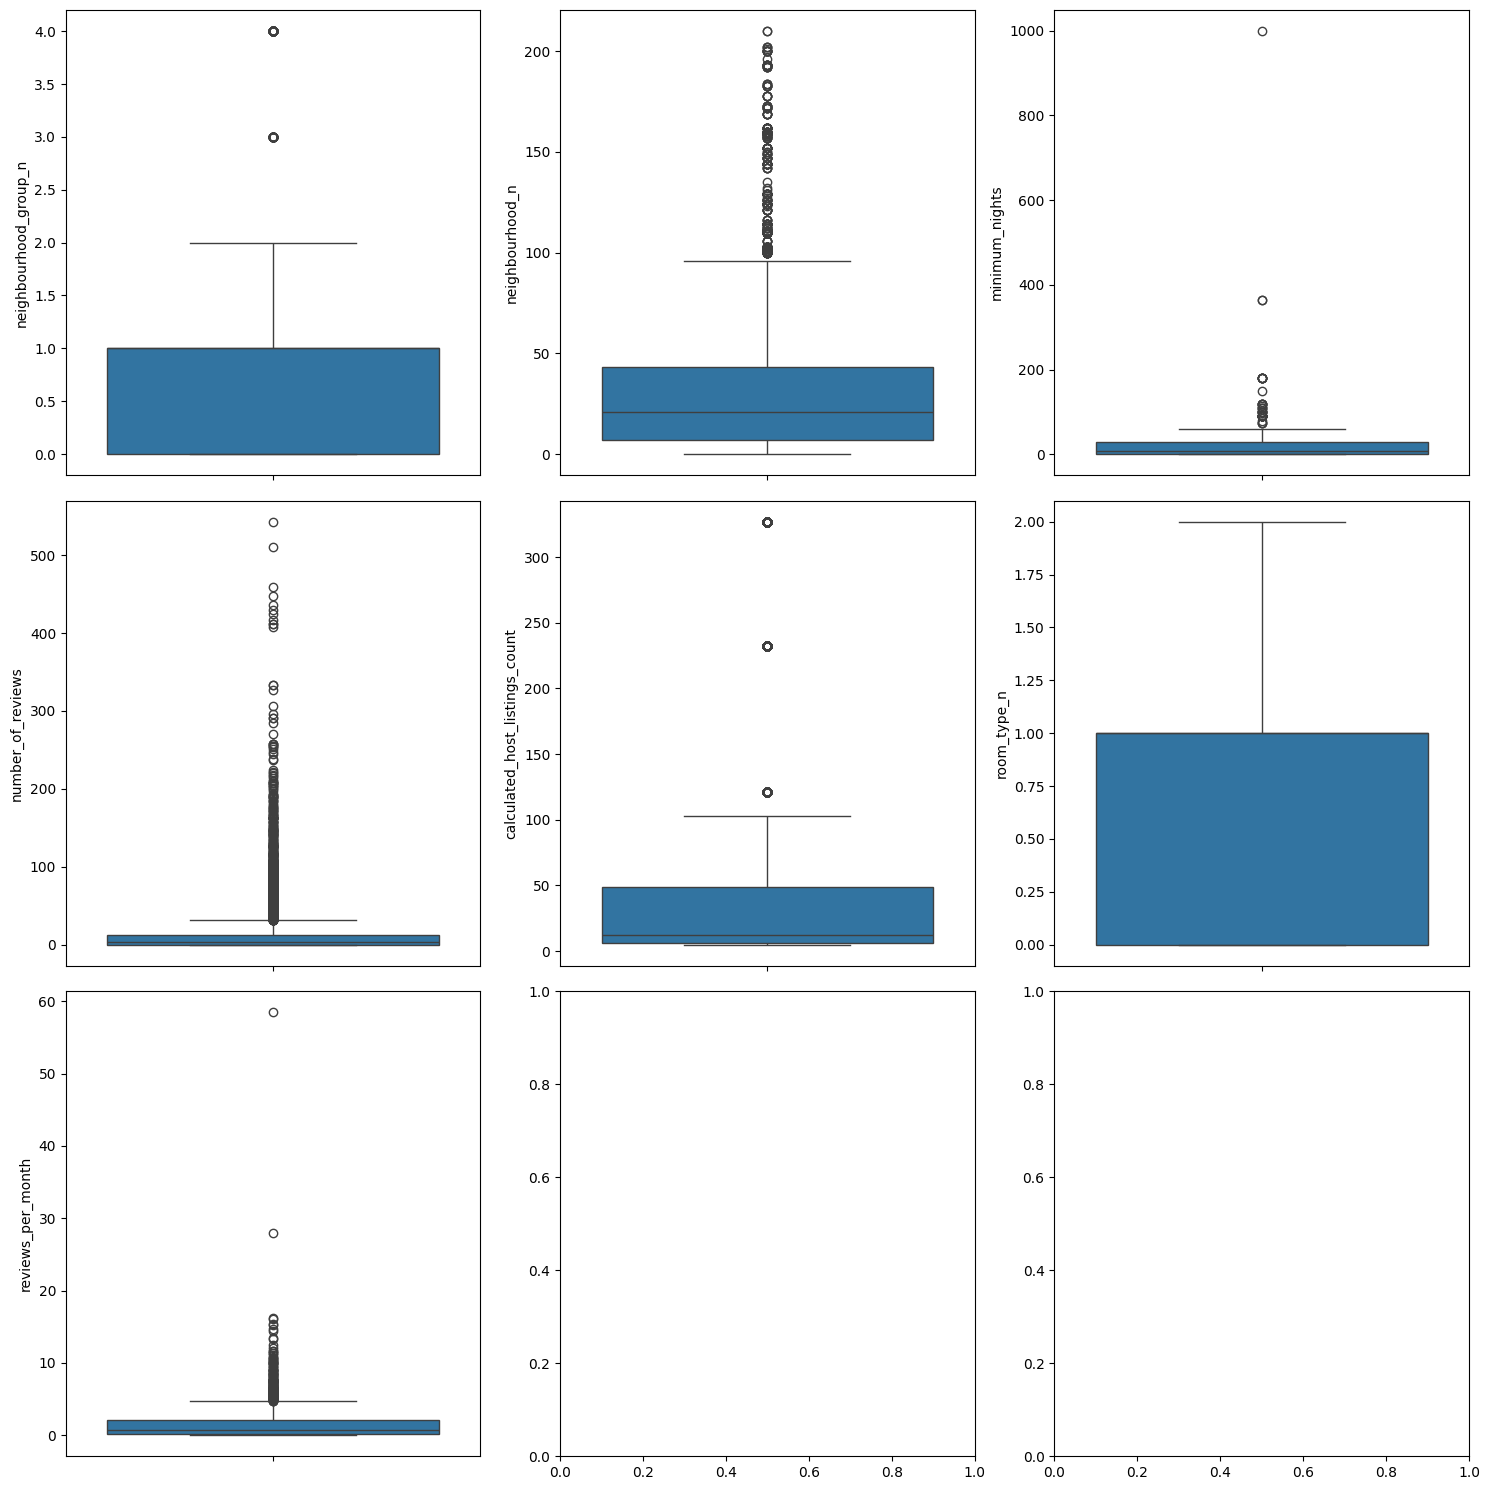

In [44]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group_n")
sns.boxplot(ax = axes[0, 1], data = df, y = "neighbourhood_n")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[2, 0], data = df, y = "reviews_per_month")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "room_type_n")

plt.tight_layout()
plt.show()

In [46]:
def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test

In [47]:
X_train, X_test = replace_outliers(X_train, X_test)

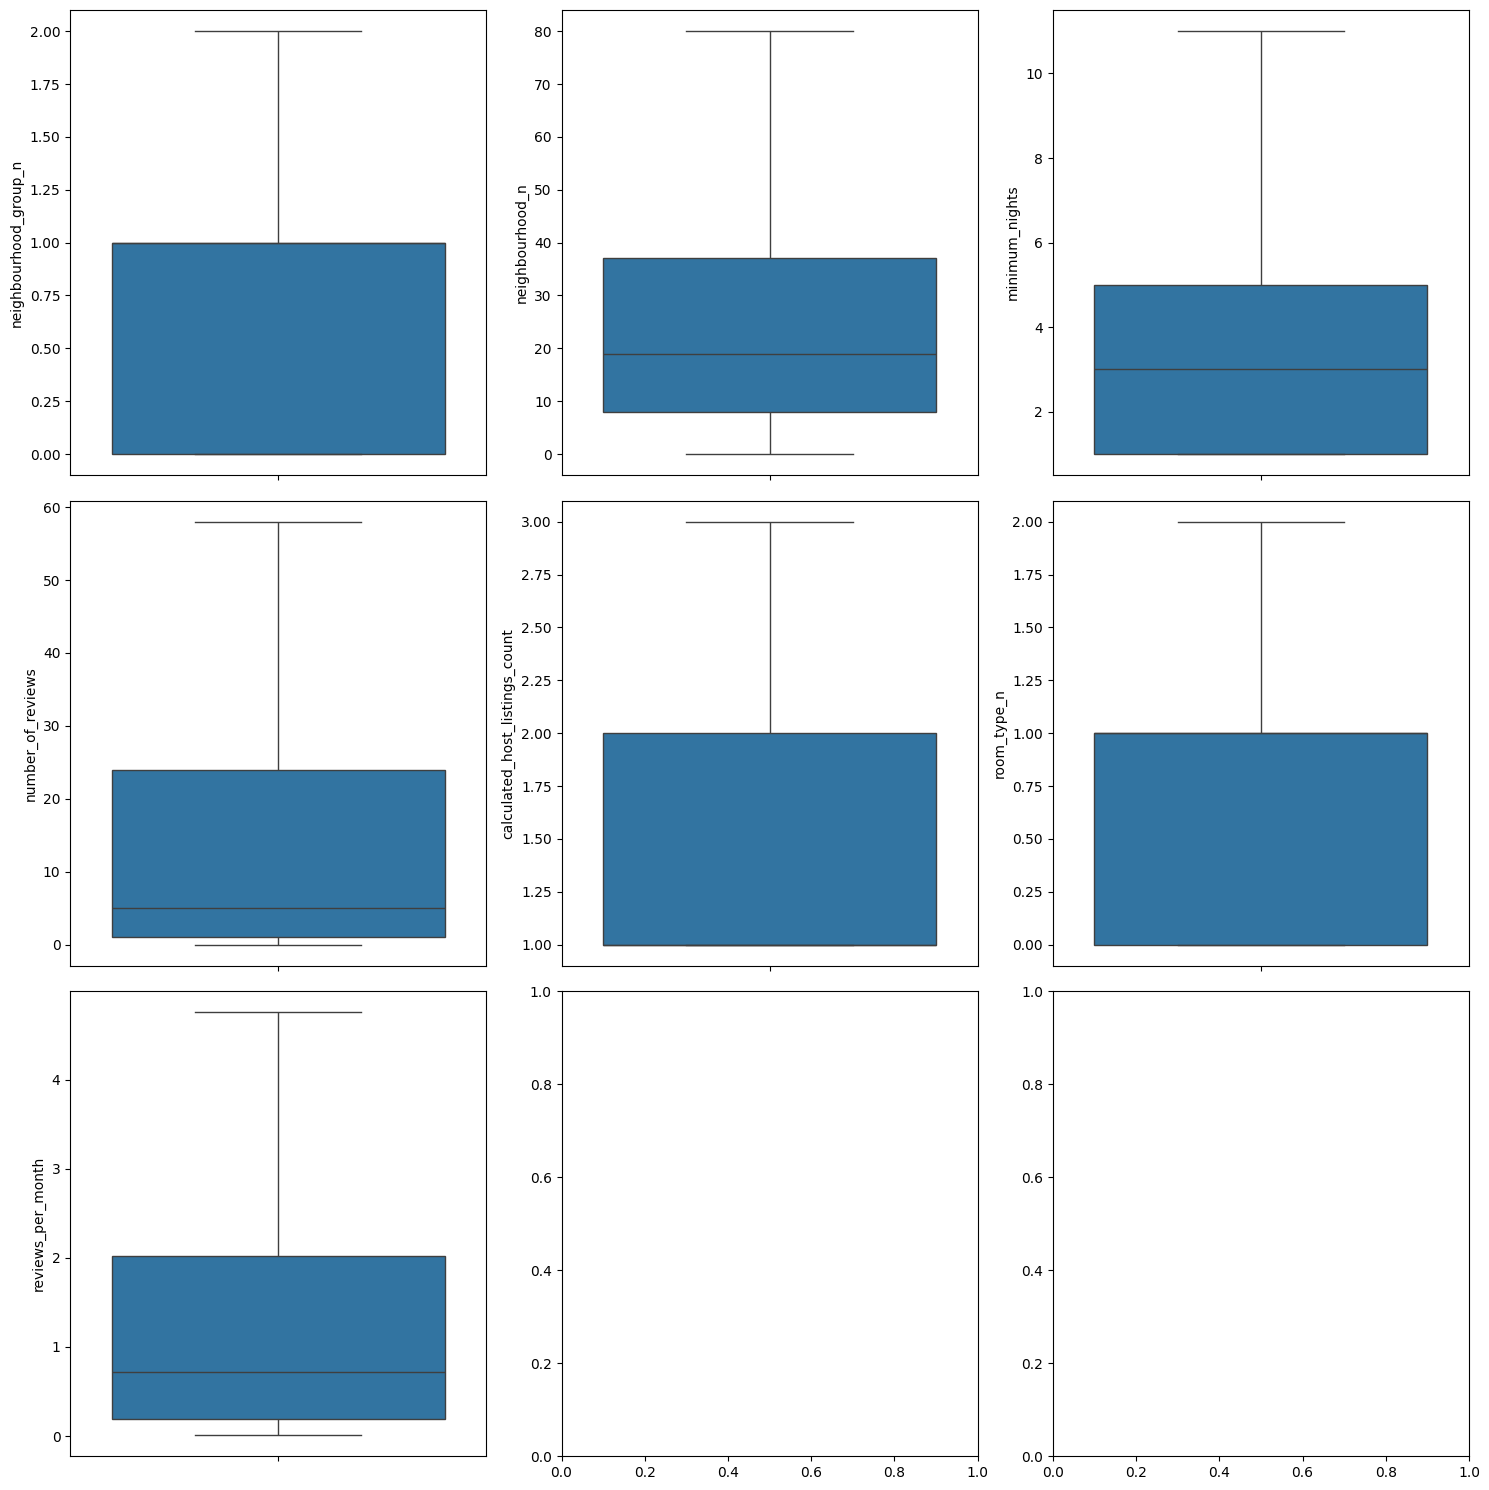

In [49]:
# To remove the fliers (the circles potentially pointing towards outliers in our previous boxplots), we can now take a look at our X_train boxplots.

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = X_train, y = "neighbourhood_group_n")
sns.boxplot(ax = axes[0, 1], data = X_train, y = "neighbourhood_n")
sns.boxplot(ax = axes[0, 2], data = X_train, y = "minimum_nights")
sns.boxplot(ax = axes[2, 0], data = X_train, y = "reviews_per_month")
sns.boxplot(ax = axes[1, 0], data = X_train, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = X_train, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = X_train, y = "room_type_n")

plt.tight_layout()
plt.show()

In [54]:
# Now we need to address any potential missing values in our dataset.

print(f"Total missing values per column in X_train:{X_train.isnull().sum(axis=0)}")
print()
print(f"Total missing values per column in X_test:{X_test.isnull().sum(axis=0)}")

Total missing values per column in X_train:minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 8077
calculated_host_listings_count       0
neighbourhood_group_n                0
neighbourhood_n                      0
room_type_n                          0
dtype: int64

Total missing values per column in X_test:minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1975
calculated_host_listings_count       0
neighbourhood_group_n                0
neighbourhood_n                      0
room_type_n                          0
dtype: int64


In [56]:
# We need to make a deciosion on how to remove the missing values, in this case we will assign the mean value for each indpendent set.

def replace_missing_vaues(x_train, x_test):
    columns = x_train.columns

    # This loop will replace missing vaues for each column
    for column in columns:
        # Find the mean using the training data points
        mean_value = x_train[column].mean()

        # Replace missing values with the mean for the column in both the training and test sets
        x_train[column] = x_train[column].fillna(mean_value)
        x_test[column] = x_test[column].fillna(mean_value)

    return x_train, x_test

    # Applying the function to then replace the missing values in each set.

X_train, X_test = replace_missing_vaues(X_train, X_test)

In [59]:
# Confirmation that the missing values are no longer within the data.
print(f"Total missing values for columns within our X_train:{X_train.isnull().sum(axis=0)}")
print()
print(f"Total missing values for columns within our X_test:{X_test.isnull().sum(axis=0)}")

Total missing values for columns within our X_train:minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64

Total missing values for columns within our X_test:minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
neighbourhood_group_n             0
neighbourhood_n                   0
room_type_n                       0
dtype: int64


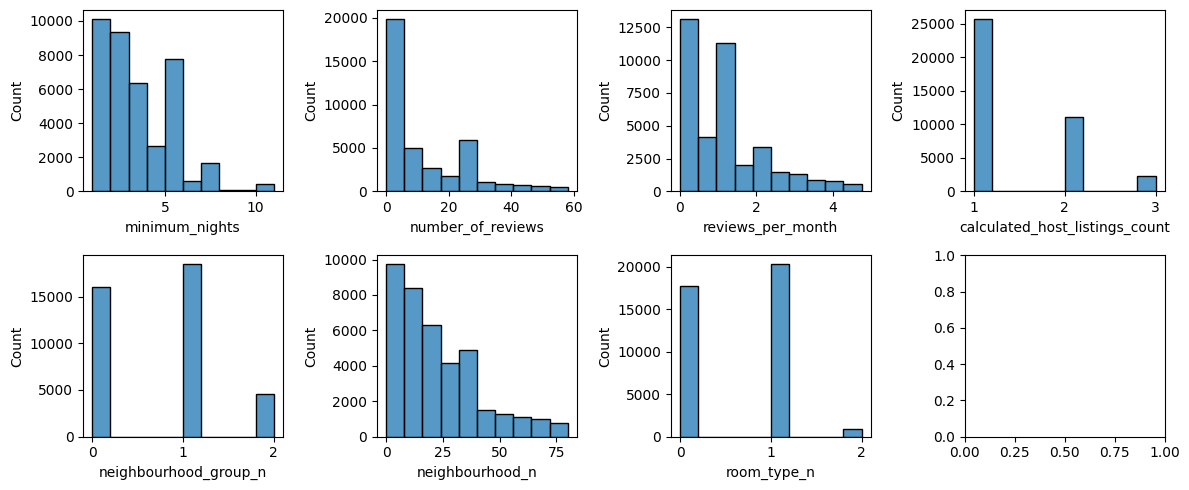

In [61]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_train, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_train, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_train, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_train, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_train, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_train, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_train, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

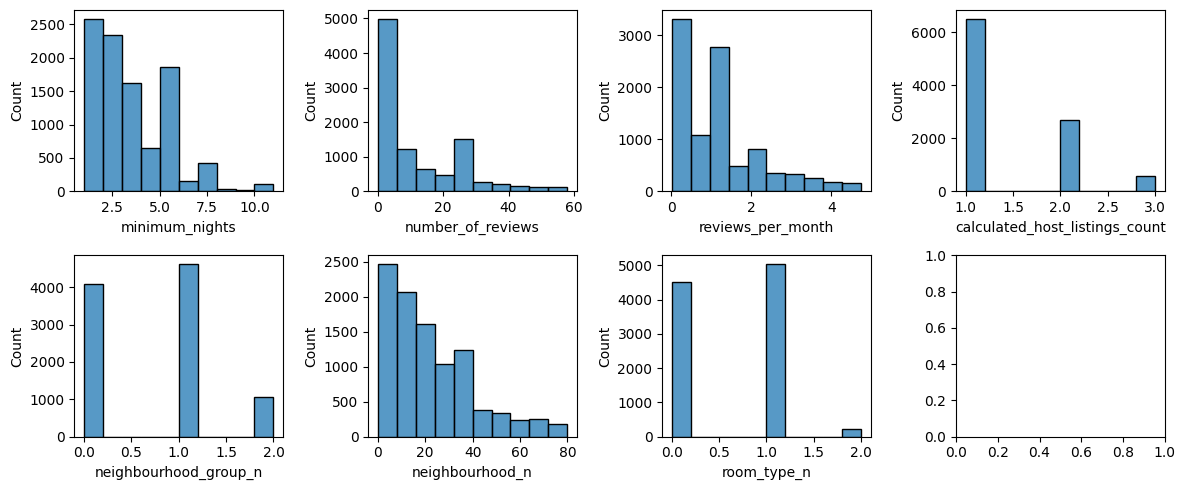

In [62]:
fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_test, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_test, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_test, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_test, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_test, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_test, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_test, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

We can see above that the scaling of our features changes considerably from the reviews per month from 0-4, while our neighbourhood_n ranges from 0-80.  We will need to fit scalers to our data.

In [68]:
# First the X-train
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled

array([[0.4       , 0.        , 0.24435181, ..., 0.5       , 0.1       ,
        0.5       ],
       [0.        , 0.4137931 , 0.42315789, ..., 0.        , 0.075     ,
        0.        ],
       [0.        , 0.05172414, 0.12      , ..., 1.        , 0.7       ,
        0.5       ],
       ...,
       [0.5       , 0.        , 0.24435181, ..., 0.        , 0.0375    ,
        0.5       ],
       [0.1       , 0.4137931 , 0.42315789, ..., 0.        , 0.15      ,
        0.        ],
       [0.        , 0.4137931 , 0.42315789, ..., 1.        , 0.4625    ,
        0.        ]])

In [69]:
X_test_scaled

array([[0.2       , 0.4137931 , 0.27368421, ..., 0.        , 0.075     ,
        0.5       ],
       [0.1       , 0.4137931 , 0.36      , ..., 0.5       , 0.35      ,
        0.        ],
       [0.2       , 0.12068966, 0.09894737, ..., 0.        , 0.2625    ,
        0.5       ],
       ...,
       [0.5       , 0.67241379, 0.08210526, ..., 0.5       , 0.0125    ,
        0.5       ],
       [0.1       , 0.25862069, 0.58736842, ..., 0.        , 0.2625    ,
        0.        ],
       [0.1       , 0.12068966, 0.69894737, ..., 0.        , 0.1625    ,
        0.5       ]])

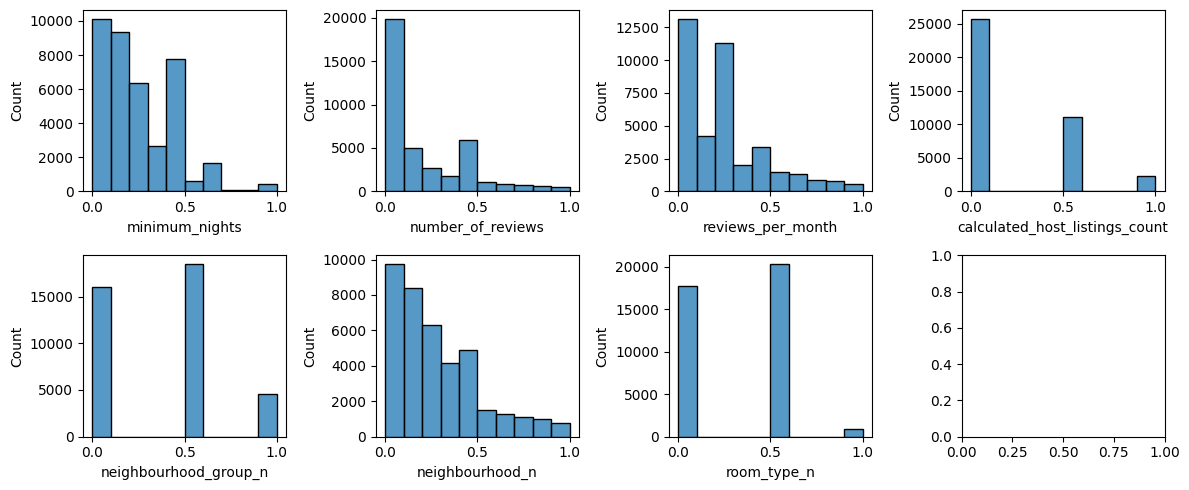

In [70]:
# Now we can plot the scaled version of the features using X_train_scaled & X_test_scaled.

# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_train_scaled_df, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_train_scaled_df, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_train_scaled_df, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_train_scaled_df, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_train_scaled_df, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_train_scaled_df, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_train_scaled_df, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

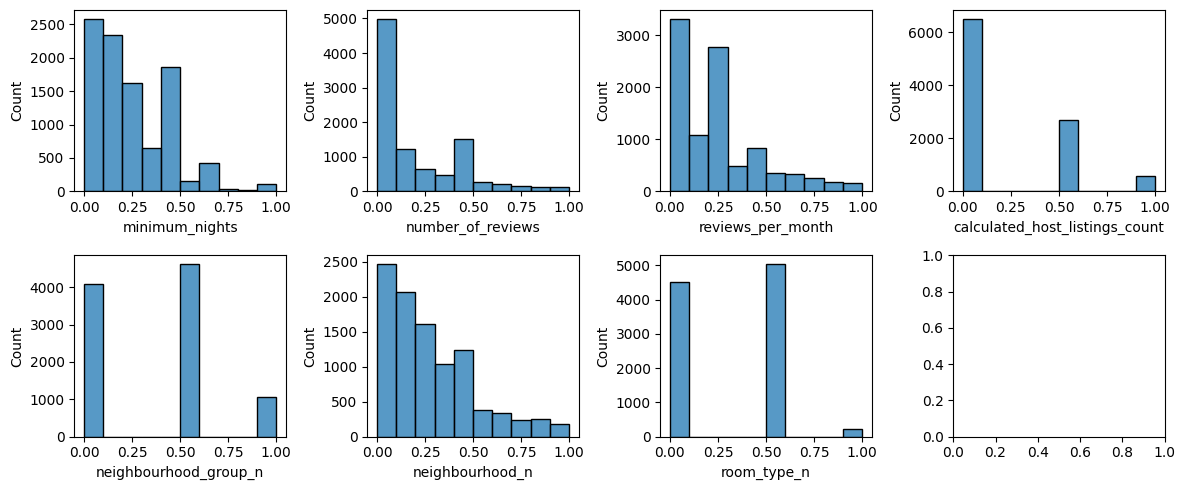

In [71]:
# Now the X_test_scaled

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_test_scaled_df, x = "minimum_nights", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_test_scaled_df, x = "number_of_reviews", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_test_scaled_df, x = "reviews_per_month", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_test_scaled_df, x = "calculated_host_listings_count", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_test_scaled_df, x = "neighbourhood_group_n", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_test_scaled_df, x = "neighbourhood_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_test_scaled_df, x = "room_type_n", bins = 10)

plt.tight_layout()

plt.show()

In [73]:
# Now we are preparing the model for use, making sure to use the 'Goldilocks' number of features.

# 'f_classif' is an ANOVA statistical test
from sklearn.feature_selection import f_classif, SelectKBest 

# this will select the K (or 5) most relevant features to predict 'price'
selection_model = SelectKBest(f_classif, k=5)

# input the X_train_scaled and y_train
selection_model.fit(X_train_scaled, y_train)

SelectKBest(k=5)

SelectKBest(k=5)

In [77]:
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns=X_test.columns.values[ix])

In [79]:
# Here we can observe the columns that were selected for the X_train set of data.
X_train_sel

,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_n,room_type_n
0,0.4,0.000000,0.0,0.1000,0.5
1,0.0,0.413793,0.5,0.0750,0.0
2,0.0,0.051724,0.5,0.7000,0.5
3,0.2,0.051724,0.5,0.6750,0.0
4,0.0,0.103448,0.0,0.4375,0.0
...,...,...,...,...,...
39111,0.1,0.413793,0.5,1.0000,0.5
39112,0.0,0.517241,0.5,0.0750,0.0
39113,0.5,0.000000,0.0,0.0375,0.5
39114,0.1,0.413793,0.5,0.1500,0.0


In [80]:
# Now the same for X_test
X_test_sel

,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_n,room_type_n
0,0.2,0.413793,0.0,0.0750,0.5
1,0.1,0.413793,0.0,0.3500,0.0
2,0.2,0.120690,0.0,0.2625,0.5
3,0.0,0.000000,0.0,0.4625,0.0
4,0.4,0.517241,0.5,0.2250,0.0
...,...,...,...,...,...
9774,0.1,0.155172,0.0,0.0750,0.5
9775,0.4,0.189655,0.0,0.0000,0.5
9776,0.5,0.672414,0.0,0.0125,0.5
9777,0.1,0.258621,1.0,0.2625,0.0


In [82]:
# Now all that's left is to display the 'score' that was created on how relevant these columns were to predict 'price'.
dict(zip(X_train.columns, selection_model.scores_))

{'minimum_nights': 2.041934043052789,
 'number_of_reviews': 2.2344469378242366,
 'reviews_per_month': 1.6152163800551305,
 'calculated_host_listings_count': 4.044015125040142,
 'neighbourhood_group_n': 1.117737852569708,
 'neighbourhood_n': 2.4183962194831126,
 'room_type_n': 32.464493106257436}